In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as const

from math import floor
import warnings
import struct #для распаковки .bin
import subprocess #для создания списка файлов
from numpy.fft import fft, rfft, irfft
import matplotlib as mpl
from scipy.interpolate import griddata

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from IPython.display import Image,display

from reparse import reparse

In [2]:
# Set the font family and size to use for Matplotlib figures.
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16

In [3]:
Omega = 2.35456e+15
LightVelocity = 2.99792e+10
a = 27.8508
RelativisticField = 1.33872e+08
FocalSpotWidthFWHM = 5e-4
LightVelocity = 2.99792e+10
ElectronsPerCell = 2.35165e+16/18

rep = reparse()

In [4]:
n_0, t, x, dxdt, az_r, num_n = rep.analytical("/home/nikita/Documents/science/midIR/all_of_it/data/theory")

['./data_n0_01.bin', './data_n0_02.bin', './data_n0_03.bin', './data_n0_04.bin', './data_n0_05.bin', './data_n0_06.bin', './data_n0_07.bin', './data_n0_08.bin', './data_n0_09.bin', './data_n0_10.bin', './data_n0_11.bin', './data_n0_12.bin', './data_n0_13.bin', './data_n0_14.bin', './data_n0_15.bin', './data_n0_16.bin', './data_n0_17.bin', './data_n0_18.bin', './data_n0_19.bin', './data_n0_20.bin']


In [5]:
def incidence(tt):
    if tt-15.998233104689266<0:
        dxdt = np.exp((-1)*((tt-15.998233104689266)/3.9995582761723165)**2)
    else:
        dxdt = np.exp((-1)*((tt-15.998233104689266)/39.99558276172316)**2)
    return dxdt
az_i = np.array([a*incidence(n)*np.sin(n)  for n in t[:,0]])

In [6]:
def theory_graph(n0, max_x, max_t):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30,10))
    #plt.figure(figsize = (5,5))
    ax1.plot(t[:,n0-1]/Omega*1.e+15, x[:,n0-1]*LightVelocity/Omega*1.e+4, linewidth = 3.0)
    ax1.set_xlabel(r"$t, fs$")
    ax1.set_ylabel(r"$x_s, \mu m$")
    ax1.set_title("Coordinate of boundary." + r" $n_0$ = {}".format(n_0[0,n0-1]))
    ax1.grid()
    ax1.axis([0, max_t, -0.01, max_x])
    #plt.show()
    
    #plt.figure(figsize = (5,5))
    ax2.plot(x[:,n0-1]*LightVelocity/Omega*1.e+4, dxdt[:,n0-1], linewidth = 3.0)
    ax2.set_xlabel(r"$x_s, \mu m$")
    ax2.set_ylabel(r"$V_x, c$")
    ax2.set_yticks(np.arange(-1.0,1.1,0.1))
    ax2.set_title("Phase portrait." + r" $n_0$ = {}".format(n_0[0,n0-1]))
    ax2.grid()
    #plt.show()
    
    #plt.figure(figsize = (5,5))
    ax3.plot((t[:,n0-1])/Omega*1.e+15, az_r[:,n0-1], label = r'$E^t_{rz}$', linewidth = 1.5)
    ax3.plot(t[:,n0-1]/Omega*1.e+15, az_i, label = r'$E^t_{iz}$', linewidth = 1.5)
    ax3.set_title("$A_z$." + r" $n_0$ = {}".format(n_0[0,n0-1]))
    ax3.set_xlabel(r"$t, fs$")
    ax3.set_ylabel(r"$A_z$, $a_0$")
    ax3.axis([0, max_t, -2*a, +2*a])
    ax3.legend()
    ax3.grid()
    #plt.show()

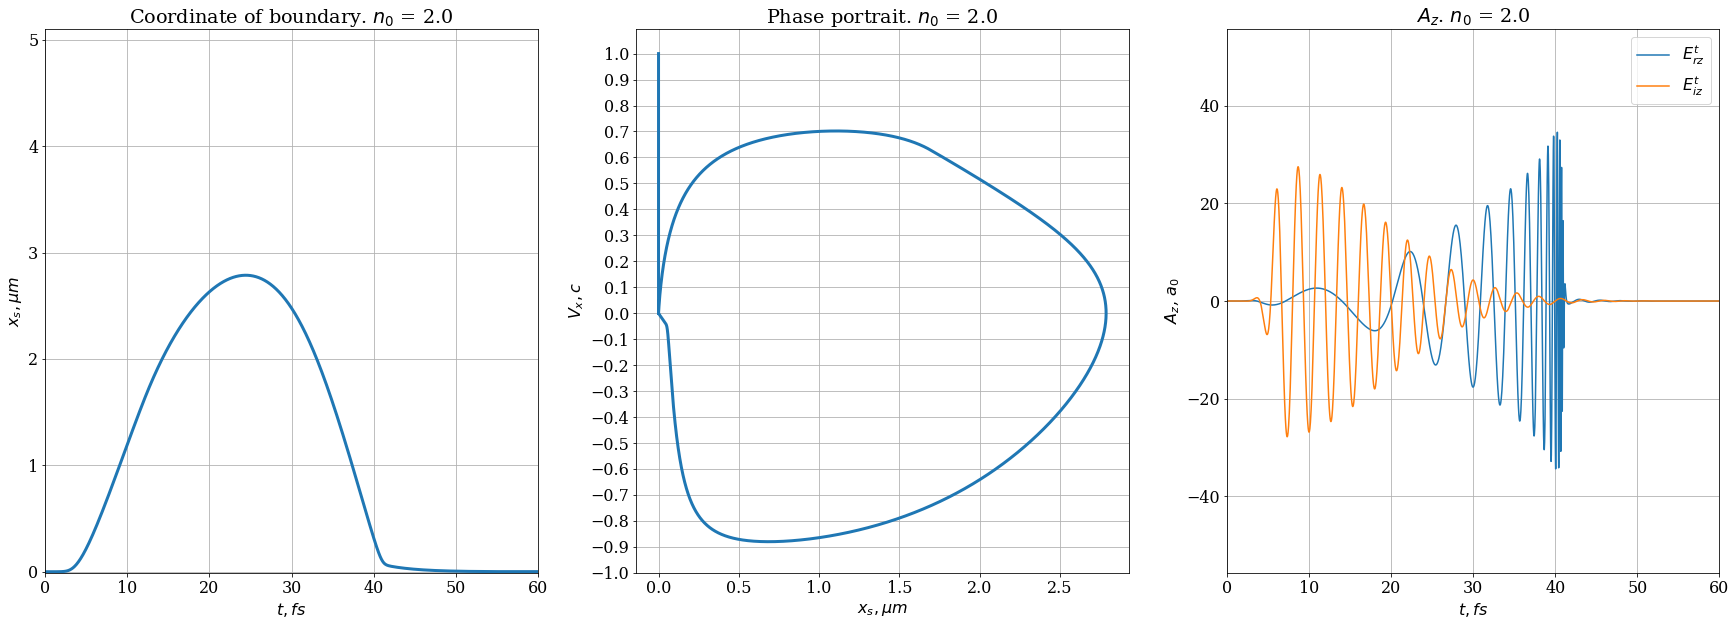

In [7]:
interactive_plot = interactive(theory_graph,
                            n0 = widgets.IntSlider(min=1,max=20,step=1,value= 2),
                            max_x = widgets.FloatText(value= 5.1),
                            max_t = widgets.FloatText(value= 60))
output = interactive_plot.children[-1]
interactive_plot

In [8]:
name_linear = "/home/nikita/Documents/science/midIR/all_of_it/data/specs/linear"
name_circular_tau = "/home/nikita/Documents/science/midIR/all_of_it/data/specs/tau_20"
name_circular_sym = "/home/nikita/Documents/science/midIR/all_of_it/data/specs/symm"

In [9]:
(n_0_circular_tau, lambda_i_ad_circular_tau, fft_i_ad_circular_tau,
 fft_r_ad_circular_tau, lambda_i_sim_circular_tau, fft_r_sim_circular_tau) = rep.circular_tau(name_circular_tau)

['./tau1_n0_01.bin', './tau1_n0_02.bin', './tau1_n0_03.bin', './tau1_n0_04.bin', './tau1_n0_05.bin', './tau1_n0_06.bin', './tau1_n0_07.bin', './tau1_n0_08.bin', './tau1_n0_09.bin', './tau1_n0_10.bin', './tau1_n0_11.bin', './tau1_n0_12.bin', './tau1_n0_13.bin', './tau1_n0_14.bin', './tau1_n0_15.bin', './tau1_n0_16.bin', './tau1_n0_17.bin', './tau1_n0_18.bin', './tau1_n0_19.bin', './tau1_n0_20.bin']


In [10]:
(n_0_circular_symm, lambda_i_ad_circular_symm, fft_i_ad_circular_symm,
 fft_r_ad_circular_symm, lambda_i_sim_circular_symm, fft_r_sim_circular_symm) = rep.circular_sym(name_circular_sym)

['./symm1_n0_01.bin', './symm1_n0_02.bin', './symm1_n0_03.bin', './symm1_n0_04.bin', './symm1_n0_05.bin', './symm1_n0_06.bin', './symm1_n0_07.bin', './symm1_n0_08.bin', './symm1_n0_09.bin', './symm1_n0_10.bin', './symm1_n0_11.bin', './symm1_n0_12.bin', './symm1_n0_13.bin', './symm1_n0_14.bin', './symm1_n0_15.bin', './symm1_n0_16.bin', './symm1_n0_17.bin', './symm1_n0_18.bin', './symm1_n0_19.bin', './symm1_n0_20.bin']


In [11]:
(n_0_linear, lambda_i_ad_linear, fft_i_ad_linear,
 fft_r_ad_linear, lambda_i_sim_linear, fft_r_sim_linear) = rep.linear(name_linear)

1
['./LinearPolarization_n0_01.bin', './LinearPolarization_n0_02.bin', './LinearPolarization_n0_03.bin', './LinearPolarization_n0_04.bin', './LinearPolarization_n0_05.bin', './LinearPolarization_n0_06.bin', './LinearPolarization_n0_07.bin', './LinearPolarization_n0_08.bin', './LinearPolarization_n0_09.bin', './LinearPolarization_n0_10.bin', './LinearPolarization_n0_11.bin', './LinearPolarization_n0_12.bin', './LinearPolarization_n0_13.bin', './LinearPolarization_n0_14.bin', './LinearPolarization_n0_15.bin', './LinearPolarization_n0_16.bin', './LinearPolarization_n0_17.bin', './LinearPolarization_n0_18.bin', './LinearPolarization_n0_19.bin', './LinearPolarization_n0_20.bin']


In [12]:
def ad_graphs1(n0):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
    ax1.loglog(lambda_i_ad_linear[:, n0-1] , fft_i_ad_linear[:, n0-1], label = r'$E^t_{i}(\lambda)$')
    ax1.loglog(lambda_i_ad_linear[:, n0-1] , fft_r_ad_linear[:, n0-1], label = r'$E^t_{r}(\lambda)$')
    ax1.loglog(lambda_i_sim_linear[:, n0-1] ,fft_r_sim_linear[:, n0-1], label = r'$E^s_{r}(\lambda)$')
    #ax.set_xticks(np.arange(0,10.1,0.2))
    #ax.set_yticks(np.arange(0,1.51,0.05))
    ax1.axis((1e-1,5e1,1e-5,1e1))
    #plt.axis((0,3,0,1))
    ax1.set_xlabel(r"$\lambda, \mu m$", fontsize=25)
    ax1.legend()
    ax1.grid(True, which="both")
    ax1.set_title(r"Linear polarization ($\updownarrow$)")

    ax2.loglog(lambda_i_sim_circular_tau[:, n0-1] , fft_i_ad_circular_tau[:, n0-1], label = r'$E^t_{i}(\lambda)$')
    ax2.loglog(lambda_i_ad_circular_tau[:, n0-1] , fft_r_ad_circular_tau[:, n0-1], label = r'$E^t_{r}(\lambda)$')
    ax2.loglog(lambda_i_sim_circular_tau[:, n0-1] ,fft_r_sim_circular_tau[:, n0-1], label = r'$E^s_{r}(\lambda)$')
    #ax.set_xticks(np.arange(0,10.1,0.2))
    #ax.set_yticks(np.arange(0,1.51,0.05))
    ax2.axis((1e-1,5e1,1e-5,1e1))
    #plt.axis((0,3,0,1))
    ax2.set_xlabel(r"$\lambda, \mu m$", fontsize=25)
    ax2.legend()
    ax2.grid(True, which="both")
    ax2.set_title(r"Circular polarization ($\circlearrowright$)")
    f.suptitle(r"$n_0 = {}$".format(n0))
    #fig.savefig("/home/nikita/Documents/science/terahertz/theory/analythical_dynamics/03.04.19/compare/symm_spectrum_y_n0_{}.png".format(n_0), dpi=fig.dpi, format = "png")
    plt.show()

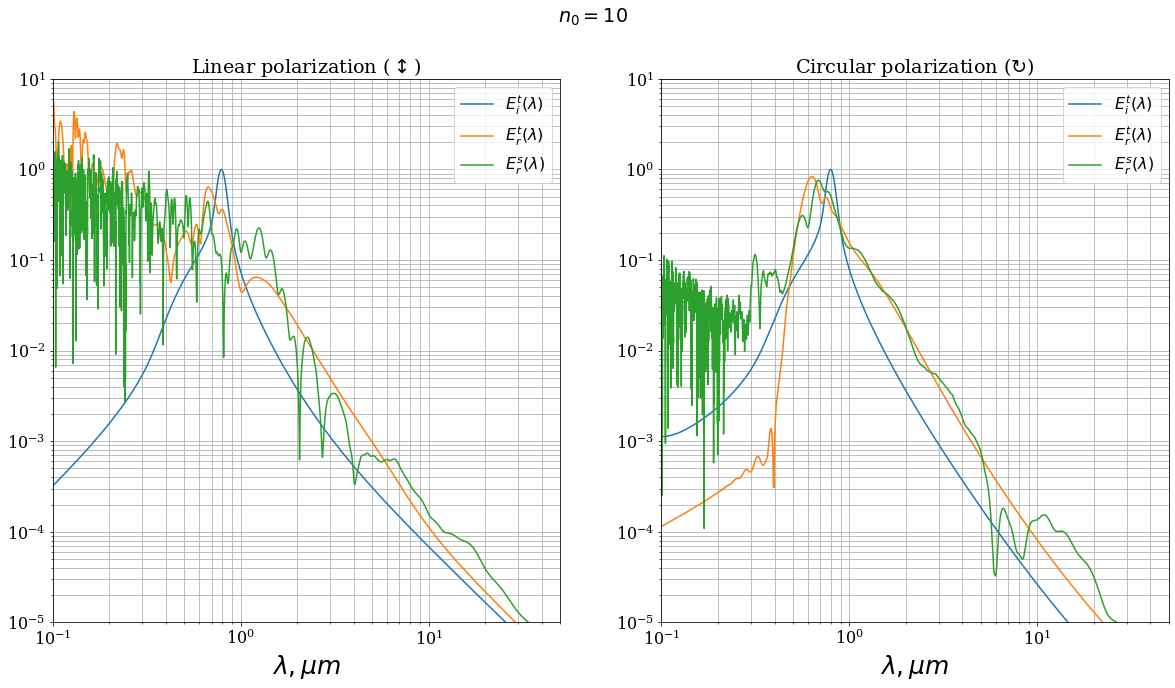

In [13]:
interactive_plot = interactive(ad_graphs1,
                            n0 = widgets.IntText(min=1,max=20,step=1,value= 10))
output = interactive_plot.children[-1]
interactive_plot

In [14]:
def ad_graphs2(n0):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
    ax1.loglog(lambda_i_sim_circular_tau[:, n0-1] ,fft_r_sim_circular_tau[:, n0-1], label = r'$E^s_{r}(\lambda)$ $\circlearrowright$')
    ax1.loglog(lambda_i_sim_linear[:, n0-1] ,fft_r_sim_linear[:, n0-1], label = r'$E^s_{r}(\lambda)$ $\updownarrow$')
    #ax.set_xticks(np.arange(0,10.1,0.2))
    #ax.set_yticks(np.arange(0,1.51,0.05))
    ax1.axis((1e-1,5e1,1e-5,1e1))
    #plt.axis((0,3,0,1))
    ax1.set_xlabel(r"$\lambda, \mu m$", fontsize=25)
    ax1.legend()
    ax1.grid(True, which="both")
    ax1.set_title("Simulation")

    ax2.loglog(lambda_i_ad_circular_tau[:, n0-1] , fft_r_ad_circular_tau[:, n0-1], label = r'$E^t_{r}(\lambda)$ $\circlearrowright$')
    ax2.loglog(lambda_i_ad_linear[:, n0-1] , fft_r_ad_linear[:, n0-1], label = r'$E^t_{r}(\lambda)$ $\updownarrow$')
    #ax.set_xticks(np.arange(0,10.1,0.2))
    #ax.set_yticks(np.arange(0,1.51,0.05))
    ax2.axis((1e-1,5e1,1e-5,1e1))
    #plt.axis((0,3,0,1))
    ax2.set_xlabel(r"$\lambda, \mu m$", fontsize=25)
    ax2.legend()
    ax2.grid(True, which="both")
    ax2.set_title("Analytical dynamics")
    f.suptitle(r"$n_0 = {}$".format(n0))
    #fig.savefig("/home/nikita/Documents/science/terahertz/theory/analythical_dynamics/03.04.19/compare/symm_spectrum_y_n0_{}.png".format(n_0), dpi=fig.dpi, format = "png")
    plt.show()

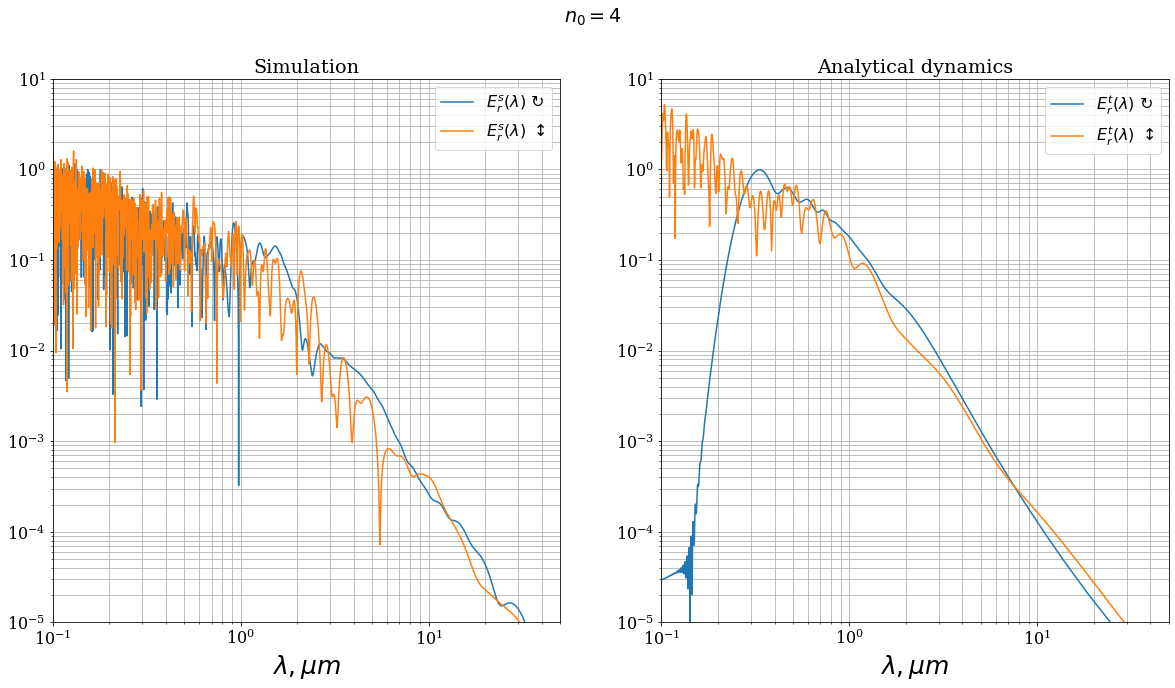

In [15]:
interactive_plot = interactive(ad_graphs2,
                            n0 = widgets.IntText(min=1,max=20,step=1,value= 4))
output = interactive_plot.children[-1]
interactive_plot

In [16]:
def ad_graphs3(n0):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
    ax1.loglog(lambda_i_sim_circular_symm[:, n0-1] , fft_i_ad_circular_symm[:, n0-1], label = r'$E^t_{i}(\lambda)$')
    ax1.loglog(lambda_i_ad_circular_symm[:, n0-1] , fft_r_ad_circular_symm[:, n0-1], label = r'$E^t_{r}(\lambda)$')
    ax1.loglog(lambda_i_sim_circular_symm[:, n0-1] ,fft_r_sim_circular_symm[:, n0-1], label = r'$E^s_{r}(\lambda)$')
    #ax.set_xticks(np.arange(0,10.1,0.2))
    #ax.set_yticks(np.arange(0,1.51,0.05))
    ax1.axis((1e-1,1e1,1e-4,2e0))
    #plt.axis((0,3,0,1))
    ax1.set_xlabel(r"$\lambda,$ $\mu m$", fontsize=25)
    ax1.legend()
    ax1.grid(True, which="both")
    ax1.set_title("Long")

    ax2.loglog(lambda_i_sim_circular_tau[:, n0-1] , fft_i_ad_circular_tau[:, n0-1], label = r'$E^t_{i}(\lambda)$')
    ax2.loglog(lambda_i_ad_circular_tau[:, n0-1] , fft_r_ad_circular_tau[:, n0-1], label = r'$E^t_{r}(\lambda)$')
    ax2.loglog(lambda_i_sim_circular_tau[:, n0-1] ,fft_r_sim_circular_tau[:, n0-1], label = r'$E^s_{r}(\lambda)$')
    #ax.set_xticks(np.arange(0,10.1,0.2))
    #ax.set_yticks(np.arange(0,1.51,0.05))
    ax2.axis((1e-1,1e1,1e-4,2e0))
    #plt.axis((0,3,0,1))
    ax2.set_xlabel(r"$\lambda,$ $\mu m$", fontsize=25)
    ax2.legend()
    ax2.grid(True, which="both")
    ax2.set_title("Steep")
    f.suptitle(r"$n_0 = {}$".format(n0))
    #f.savefig("/home/nikita/Documents/magistracy/final/11_3.png", dpi=500, format = "png")
    plt.show()

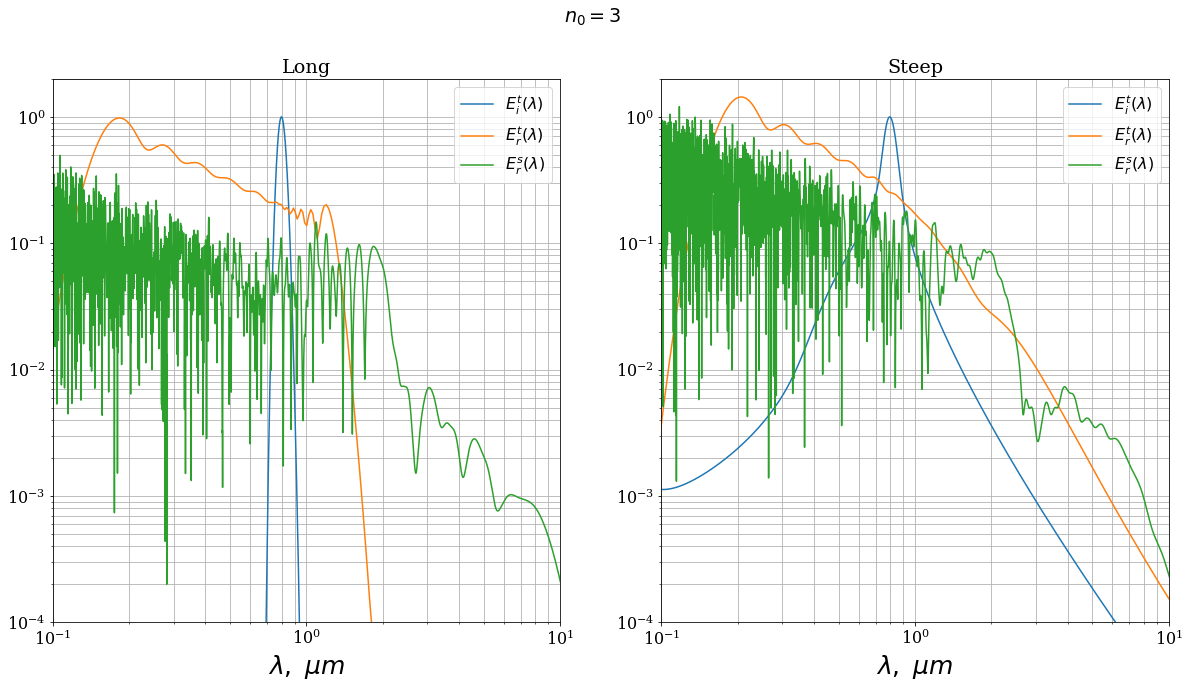

In [17]:
interactive_plot = interactive(ad_graphs3,
                            n0 = widgets.IntText(min=1,max=20,step=1,value= 3))
output = interactive_plot.children[-1]
interactive_plot

In [18]:
def ad_graphs4(n0):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
    ax1.loglog(lambda_i_sim_circular_tau[:, n0-1] ,fft_r_sim_circular_tau[:, n0-1], label = r'$E^s_{r}((\lambda)$ ($\circlearrowright$ steep)')
    ax1.loglog(lambda_i_sim_circular_symm[:, n0-1] ,fft_r_sim_circular_symm[:, n0-1], label = r'$E^s_{r}(\lambda)$ ($\circlearrowright$ long)')
    #ax.set_xticks(np.arange(0,10.1,0.2))
    #ax.set_yticks(np.arange(0,1.51,0.05))
    ax1.axis((1e-1,5e1,1e-5,1e1))
    #plt.axis((0,3,0,1))
    ax1.set_xlabel(r"$\lambda, \mu m$", fontsize=25)
    ax1.legend()
    ax1.grid(True, which="both")
    ax1.set_title("Simulation")

    ax2.loglog(lambda_i_ad_circular_tau[:, n0-1] , fft_r_ad_circular_tau[:, n0-1], label = r'$E^t_{r}(\lambda)$ ($\circlearrowright$ steep)')
    ax2.loglog(lambda_i_ad_circular_symm[:, n0-1] , fft_r_ad_circular_symm[:, n0-1], label = r'$E^t_{r}(\lambda)$ ($\circlearrowright$ long)')
    #ax.set_xticks(np.arange(0,10.1,0.2))
    #ax.set_yticks(np.arange(0,1.51,0.05))
    ax2.axis((1e-1,5e1,1e-5,1e1))
    #plt.axis((0,3,0,1))
    ax2.set_xlabel(r"$\lambda, \mu m$", fontsize=25)
    ax2.legend()
    ax2.grid(True, which="both")
    ax2.set_title("Analytical dynamics")
    f.suptitle(r"$n_0 = {}$".format(n0))
    #fig.savefig("/home/nikita/Documents/science/terahertz/theory/analythical_dynamics/03.04.19/compare/symm_spectrum_y_n0_{}.png".format(n_0), dpi=fig.dpi, format = "png")
    plt.show()

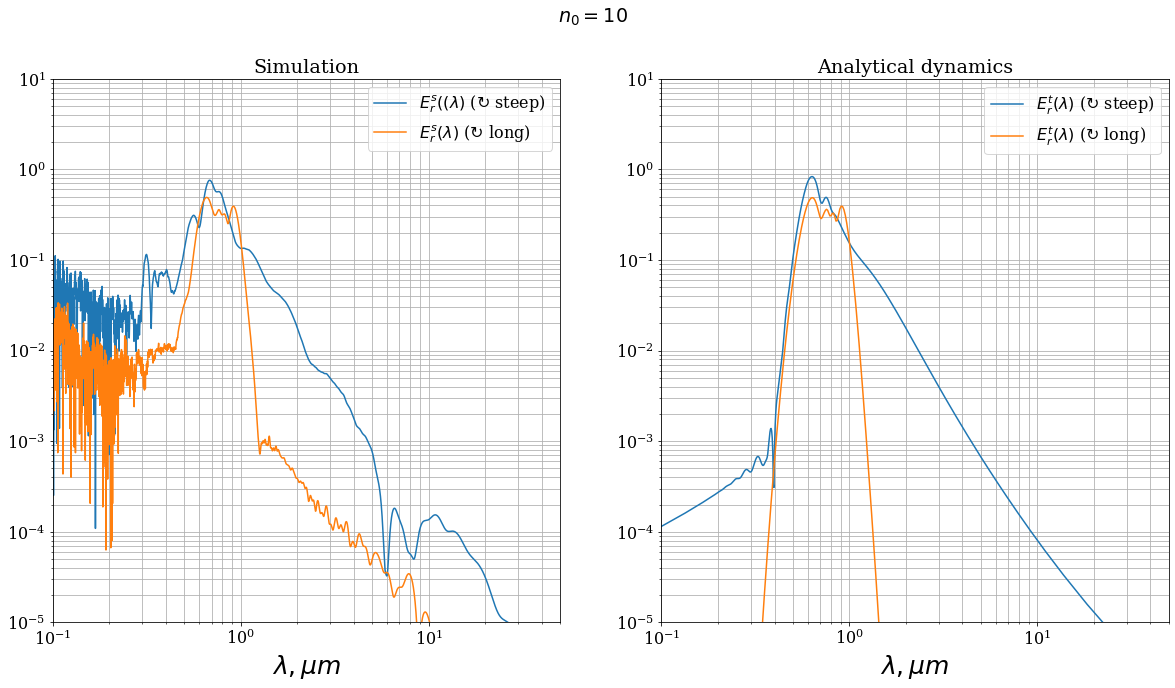

In [19]:
interactive_plot = interactive(ad_graphs4,
                            n0 = widgets.IntText(min=1,max=20,step=1,value= 10))
output = interactive_plot.children[-1]
interactive_plot

In [20]:
folder_name_circular_steep = "/home/nikita/Documents/science/midIR/all_of_it/data/energy/circ_steep"
folder_name_circular_long = "/home/nikita/Documents/science/midIR/all_of_it/data/energy/circ_long"
folder_name_linear_steep = "/home/nikita/Documents/science/midIR/all_of_it/data/energy/linear_steep"
folder_name_linear_long = "/home/nikita/Documents/science/midIR/all_of_it/data/energy/linear_long"

In [21]:
n_0_circular_steep, lambda_s_circular_steep, energy_circular_steep, num_n_circular_steep = rep.energy(folder_name_circular_steep, "n0*.bin")

for i in range(len(n_0_circular_steep)):
    lambda_s_circular_steep[i] = [x for _,x in sorted(zip(n_0_circular_steep[i],lambda_s_circular_steep[i]))]
    energy_circular_steep[i] = [x for _,x in sorted(zip(n_0_circular_steep[i],energy_circular_steep[i]))]
    n_0_circular_steep[i].sort()

['./n0_1.78.bin', './n0_3.27.bin', './n0_15.00.bin', './n0_5.49.bin', './n0_8.99.bin', './n0_5.79.bin', './n0_6.39.bin', './n0_6.15.bin', './n0_2.97.bin', './n0_7.53.bin', './n0_4.88.bin', './n0_5.83.bin', './n0_3.89.bin', './n0_8.42.bin', './n0_1.92.bin', './n0_4.07.bin', './n0_2.78.bin', './n0_5.73.bin', './n0_4.89.bin', './n0_12.00.bin', './n0_7.02.bin', './n0_9.78.bin', './n0_8.88.bin', './n0_1.79.bin', './n0_8.91.bin', './n0_1.16.bin', './n0_5.88.bin', './n0_2.63.bin', './n0_4.83.bin', './n0_6.48.bin', './n0_6.72.bin', './n0_9.29.bin', './n0_3.13.bin', './n0_5.11.bin', './n0_2.81.bin', './n0_7.31.bin', './n0_1.10.bin', './n0_25.00.bin', './n0_7.72.bin', './n0_4.16.bin', './n0_1.82.bin', './n0_10.00.bin', './n0_6.55.bin', './n0_1.42.bin', './n0_1.91.bin', './n0_1.22.bin', './n0_3.16.bin', './n0_11.00.bin', './n0_7.73.bin']


In [22]:
n_0_circular_long, lambda_s_circular_long, energy_circular_long, num_n_circular_long = rep.energy(folder_name_circular_long, "n0*.bin")

for i in range(len(n_0_circular_long)):
    lambda_s_circular_long[i] = [x for _,x in sorted(zip(n_0_circular_long[i],lambda_s_circular_long[i]))]
    energy_circular_long[i] = [x for _,x in sorted(zip(n_0_circular_long[i],energy_circular_long[i]))]
    n_0_circular_long[i].sort()

['./n0_7.45.bin', './n0_1.14.bin', './n0_15.00.bin', './n0_2.25.bin', './n0_8.71.bin', './n0_4.56.bin', './n0_1.87.bin', './n0_6.09.bin', './n0_3.20.bin', './n0_7.70.bin', './n0_2.02.bin', './n0_3.12.bin', './n0_8.74.bin', './n0_5.36.bin', './n0_7.95.bin', './n0_3.95.bin', './n0_12.00.bin', './n0_1.61.bin', './n0_2.54.bin', './n0_5.48.bin', './n0_6.36.bin', './n0_7.49.bin', './n0_3.80.bin', './n0_6.59.bin', './n0_7.64.bin', './n0_1.71.bin', './n0_3.47.bin', './n0_2.64.bin', './n0_8.29.bin', './n0_3.87.bin', './n0_2.05.bin', './n0_2.89.bin', './n0_5.91.bin', './n0_4.09.bin', './n0_9.84.bin', './n0_7.10.bin', './n0_25.00.bin', './n0_6.20.bin', './n0_2.40.bin', './n0_6.30.bin', './n0_2.08.bin', './n0_8.20.bin', './n0_1.82.bin', './n0_10.00.bin', './n0_8.09.bin', './n0_11.00.bin', './n0_2.44.bin', './n0_3.50.bin']


In [23]:
n_0_linear_steep, lambda_s_linear_steep, energy_linear_steep, num_n_linear_steep = rep.energy(folder_name_linear_steep, "n0*.bin")

for i in range(len(n_0_linear_steep)):
    lambda_s_linear_steep[i] = [x for _,x in sorted(zip(n_0_linear_steep[i],lambda_s_linear_steep[i]))]
    energy_linear_steep[i] = [x for _,x in sorted(zip(n_0_linear_steep[i],energy_linear_steep[i]))]
    n_0_linear_steep[i].sort()

['./n0_9.07.bin', './n0_1.29.bin', './n0_1.31.bin', './n0_15.00.bin', './n0_4.73.bin', './n0_6.18.bin', './n0_8.14.bin', './n0_6.96.bin', './n0_5.43.bin', './n0_2.16.bin', './n0_1.54.bin', './n0_5.06.bin', './n0_3.23.bin', './n0_4.18.bin', './n0_12.00.bin', './n0_9.36.bin', './n0_2.33.bin', './n0_3.44.bin', './n0_1.68.bin', './n0_5.96.bin', './n0_8.43.bin', './n0_1.16.bin', './n0_1.56.bin', './n0_7.58.bin', './n0_3.03.bin', './n0_9.66.bin', './n0_1.18.bin', './n0_9.74.bin', './n0_9.81.bin', './n0_6.73.bin', './n0_2.34.bin', './n0_7.38.bin', './n0_2.59.bin', './n0_8.58.bin', './n0_8.92.bin', './n0_5.25.bin', './n0_25.00.bin', './n0_5.32.bin', './n0_6.30.bin', './n0_8.16.bin', './n0_1.82.bin', './n0_10.00.bin', './n0_6.55.bin', './n0_1.42.bin', './n0_6.40.bin', './n0_4.50.bin', './n0_11.00.bin', './n0_1.53.bin', './n0_9.44.bin', './n0_2.51.bin']


In [24]:
n_0_linear_long, lambda_s_linear_long, energy_linear_long, num_n_linear_long = rep.energy(folder_name_linear_long, "n0*.bin")

for i in range(len(n_0_linear_long)):
    lambda_s_linear_long[i] = [x for _,x in sorted(zip(n_0_linear_long[i],lambda_s_linear_long[i]))]
    energy_linear_long[i] = [x for _,x in sorted(zip(n_0_linear_long[i],energy_linear_long[i]))]
    n_0_linear_long[i].sort()

['./n0_1.05.bin', './n0_15.00.bin', './n0_6.35.bin', './n0_4.41.bin', './n0_7.53.bin', './n0_5.65.bin', './n0_3.58.bin', './n0_6.47.bin', './n0_2.42.bin', './n0_3.31.bin', './n0_5.36.bin', './n0_7.51.bin', './n0_2.60.bin', './n0_4.18.bin', './n0_12.00.bin', './n0_1.61.bin', './n0_5.13.bin', './n0_1.80.bin', './n0_5.30.bin', './n0_5.84.bin', './n0_2.76.bin', './n0_3.38.bin', './n0_5.24.bin', './n0_4.82.bin', './n0_9.12.bin', './n0_4.30.bin', './n0_7.90.bin', './n0_1.01.bin', './n0_9.46.bin', './n0_8.69.bin', './n0_5.25.bin', './n0_6.26.bin', './n0_7.79.bin', './n0_8.93.bin', './n0_1.10.bin', './n0_25.00.bin', './n0_5.00.bin', './n0_8.44.bin', './n0_1.76.bin', './n0_1.33.bin', './n0_8.37.bin', './n0_3.35.bin', './n0_7.92.bin', './n0_10.00.bin', './n0_5.90.bin', './n0_1.37.bin', './n0_11.00.bin']


In [25]:
def built_graph_circular_steep(dl, range_l, range_n0, limit_e, dl_graph):
    max_l = range_l[1]
    min_l = range_l[0]
    num_ll = int((max_l-min_l)/dl)
    range1 = np.zeros((num_ll,num_n_circular_steep-4))
    for i in np.arange(0, num_n_circular_steep-4):
        for j in np.arange(0,num_ll):
            mask = np.where((lambda_s_circular_steep.T[i] > min_l+j*dl) & (lambda_s_circular_steep.T[i] < min_l+(j+1)*dl))[0]
            for i1 in mask:
                range1[j][i] += energy_circular_steep[i1,i]        
    fig = plt.figure(figsize=(20,10))
    c_ax = plt.imshow(range1.T, extent = (min_l,min_l + dl*num_ll,num_n_circular_steep-4+0.5,0.5), aspect = "auto", vmax = limit_e, vmin = 0)
    plt.xticks(np.arange(min_l,max_l,dl_graph))
    plt.xlabel(r"$\lambda ,$ $\mu m$")
    plt.yticks(np.arange(1,num_n_circular_steep-4,1))
    plt.ylabel(r"$n_0$")
    cbar = plt.colorbar()
    cbar.set_label("Energy, J")
    plt.axis([min_l,max_l,range_n0[1],range_n0[0]])
    plt.title(r"$\circlearrowright$ steep")
    plt.grid()
    plt.show()
    #fig.savefig("/home/nikita/Documents/magistracy/final/8_1.png", dpi=fig.dpi, format = "png")

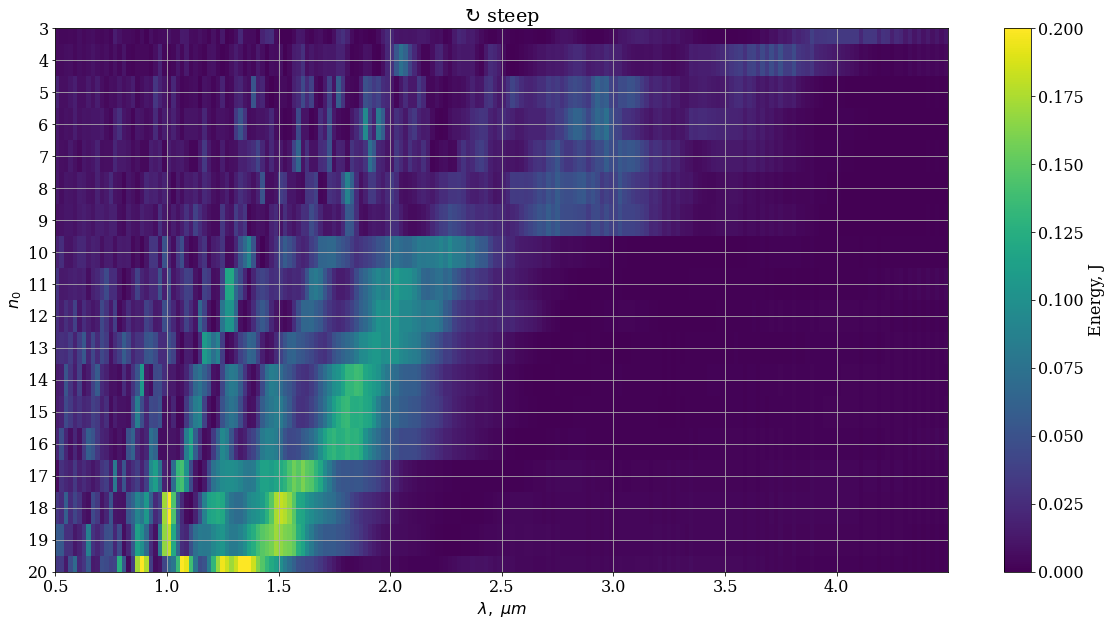

In [26]:
interactive_plot = interactive(built_graph_circular_steep,
                            dl = widgets.FloatText(value= 0.02),
                            range_l = widgets.FloatRangeSlider(min=0,max=20,step=0.1,value= [0.5, 4.5]),
                            range_n0 = widgets.FloatRangeSlider(min=1,max=20,step=1,value= [3, 20]),
                            limit_e = widgets.FloatText(value= 0.20),
                            dl_graph = widgets.FloatText(value= 0.5))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

In [27]:
def built_graph_circular_long(dl, range_l, range_n0, limit_e, dl_graph):
    max_l = range_l[1]
    min_l = range_l[0]
    num_ll = int((max_l-min_l)/dl)
    range1 = np.zeros((num_ll,num_n_circular_long-4))
    for i in np.arange(0, num_n_circular_long-4):
        for j in np.arange(0,num_ll):
            mask = np.where((lambda_s_circular_long.T[i] > min_l+j*dl) & (lambda_s_circular_long.T[i] < min_l+(j+1)*dl))[0]
            for i1 in mask:
                range1[j][i] += energy_circular_long[i1,i]
    fig = plt.figure(figsize=(20,10))
    plt.imshow(range1.T, extent = (min_l,min_l + dl*num_ll,num_n_circular_long-4+0.5,0.5), aspect = "auto", vmax = limit_e, vmin = 0)
    plt.xticks(np.arange(min_l,max_l,dl_graph))
    plt.xlabel(r"$\lambda,$ $\mu m$")
    plt.yticks(np.arange(1,num_n_circular_long-4,1))
    plt.ylabel(r"$n_0$")
    cbar = plt.colorbar()
    cbar.set_label("Energy, J")
    plt.axis([min_l,max_l,range_n0[1],range_n0[0]])
    plt.grid()
    plt.title(r"$\circlearrowright$ long")
    #fig.savefig("/home/nikita/Documents/magistracy/final/8_2.png", dpi=fig.dpi, format = "png")
    plt.show()

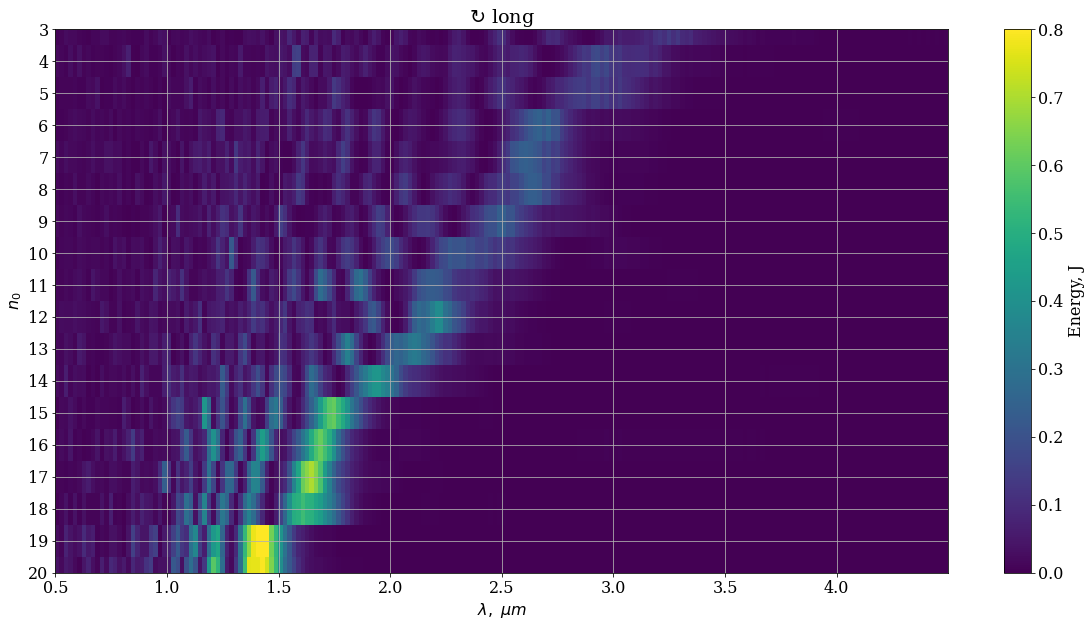

In [28]:
interactive_plot = interactive(built_graph_circular_long,
                            dl = widgets.FloatText(value= 0.02),
                            range_l = widgets.FloatRangeSlider(min=0,max=20,step=0.1,value= [0.5, 4.5]),
                            range_n0 = widgets.FloatRangeSlider(min=1,max=20,step=1,value= [3, 20]),
                            limit_e = widgets.FloatText(value= 0.8),
                            dl_graph = widgets.FloatText(value= 0.5))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

In [29]:
def built_graph_linear_steep(dl, range_l, range_n0, limit_e, dl_graph):
    max_l = range_l[1]
    min_l = range_l[0]
    num_ll = int((max_l-min_l)/dl)
    range1 = np.zeros((num_ll,num_n_linear_steep-4))
    for i in np.arange(0, num_n_linear_steep-4):
        for j in np.arange(0,num_ll):
            mask = np.where((lambda_s_linear_steep.T[i] > min_l+j*dl) & (lambda_s_linear_steep.T[i] < min_l+(j+1)*dl))[0]
            for i1 in mask:
                range1[j][i] += energy_linear_steep[i1,i]    
    fig = plt.figure(figsize=(20,10))
    plt.imshow(range1.T, extent = (min_l,min_l + dl*num_ll,num_n_linear_steep-4+0.5,0.5), aspect = "auto", vmax = limit_e, vmin = 0)
    plt.xticks(np.arange(min_l,max_l,dl_graph))
    plt.xlabel(r"$\lambda,$ $\mu m$")
    plt.yticks(np.arange(1,num_n_linear_steep-4,1))
    plt.ylabel(r"$n_0$")
    cbar = plt.colorbar()
    cbar.set_label("Energy, J")
    plt.axis([min_l,max_l,range_n0[1],range_n0[0]])
    plt.grid()
    plt.title(r"$\updownarrow$ steep")
    #fig.savefig("/home/nikita/Documents/magistracy/final/8_3.png", dpi=fig.dpi, format = "png")
    plt.show()

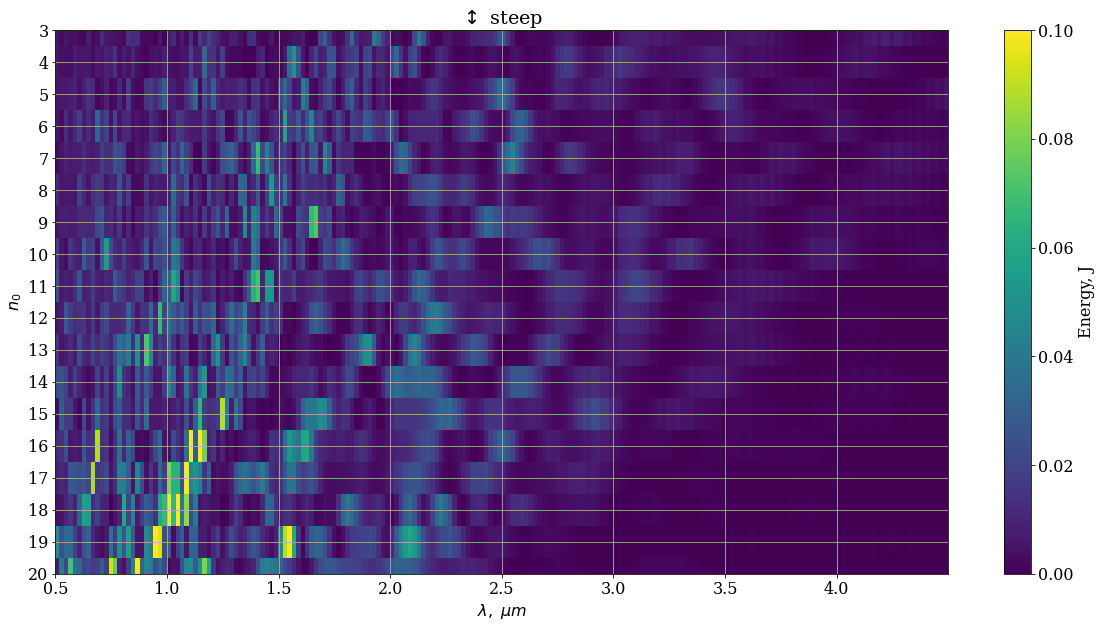

In [30]:
interactive_plot = interactive(built_graph_linear_steep,
                            dl = widgets.FloatText(value= 0.02),
                            range_l = widgets.FloatRangeSlider(min=0,max=20,step=0.1,value= [0.5, 4.5]),
                            range_n0 = widgets.FloatRangeSlider(min=1,max=20,step=1,value= [3, 20]),
                            limit_e = widgets.FloatText(value= 0.1),
                            dl_graph = widgets.FloatText(value= 0.5))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

In [31]:
def built_graph_linear_long(dl, range_l, range_n0, limit_e, dl_graph):
    max_l = range_l[1]
    min_l = range_l[0]
    num_ll = int((max_l-min_l)/dl)
    range1 = np.zeros((num_ll,num_n_linear_long-4))
    for i in np.arange(0, num_n_linear_long-4):
        for j in np.arange(0,num_ll):
            mask = np.where((lambda_s_linear_long.T[i] > min_l+j*dl) & (lambda_s_linear_long.T[i] < min_l+(j+1)*dl))[0]
            for i1 in mask:
                range1[j][i] += energy_linear_long[i1,i]       
    fig = plt.figure(figsize=(20,10))
    plt.imshow(range1.T, extent = (min_l,min_l + dl*num_ll,num_n_linear_long-4+0.5,0.5), aspect = "auto", vmax = limit_e, vmin = 0)
    plt.xticks(np.arange(min_l,max_l,dl_graph))
    plt.xlabel(r"$\lambda,$ $\mu m$")
    plt.yticks(np.arange(1,num_n_linear_long-4,1))
    plt.ylabel(r"$n_0$")
    cbar = plt.colorbar()
    cbar.set_label("Energy, J")
    plt.axis([min_l,max_l,range_n0[1],range_n0[0]])
    plt.grid()
    plt.title(r"$\updownarrow$ long")
    #fig.savefig("/home/nikita/Documents/magistracy/final/8_4.png", dpi=fig.dpi, format = "png")
    plt.show()

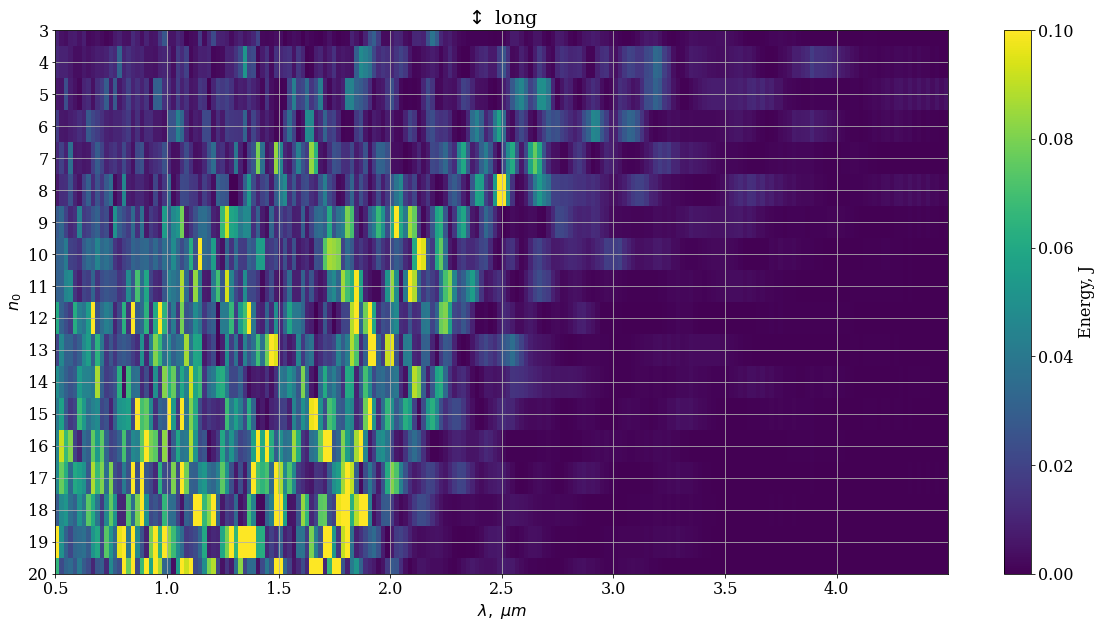

In [32]:
interactive_plot = interactive(built_graph_linear_long,
                            dl = widgets.FloatText(value= 0.02),
                            range_l = widgets.FloatRangeSlider(min=0,max=20,step=0.1,value= [0.5, 4.5]),
                            range_n0 = widgets.FloatRangeSlider(min=1,max=20,step=1,value= [3, 20]),
                            limit_e = widgets.FloatText(value= 0.1),
                            dl_graph = widgets.FloatText(value= 0.5))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

In [33]:
def built_graph_compare(r1, limit):
    range1 = np.zeros(num_n_circular_steep)
    range2 = np.zeros(num_n_circular_long)
    range3 = np.zeros(num_n_linear_steep)
    range4 = np.zeros(num_n_linear_long)
    for i in np.arange(0, num_n_circular_steep):
        mask1 = np.where((lambda_s_circular_steep.T[i] > r1[0]) & (lambda_s_circular_steep.T[i] < r1[1]))[0]
        for i1 in mask1:
            range1[i] += energy_circular_steep[i1,i]/11*100
    for i in np.arange(0, num_n_circular_long):
        mask1 = np.where((lambda_s_circular_long.T[i] > r1[0]) & (lambda_s_circular_long.T[i] < r1[1]))[0]
        for i1 in mask1:
            range2[i] += energy_circular_long[i1,i]/20*100
    for i in np.arange(0, num_n_linear_steep):
        mask1 = np.where((lambda_s_linear_steep.T[i] > r1[0]) & (lambda_s_linear_steep.T[i] < r1[1]))[0]
        for i1 in mask1:
            range3[i] += energy_linear_steep[i1,i]/5.5*100
    for i in np.arange(0, num_n_linear_long):
        mask1 = np.where((lambda_s_linear_long.T[i] > r1[0]) & (lambda_s_linear_long.T[i] < r1[1]))[0]
        for i1 in mask1:
            range4[i] += energy_linear_long[i1,i]/10*100
    fig = plt.figure(figsize=(12,6))
    plt.plot(n_0_circular_steep[1],range1, label = "$\circlearrowright$ steep".format(r1[0], r1[1]), linewidth = 3)
    plt.plot(n_0_circular_long[1],range2, label = "$\circlearrowright$ long".format(r1[0], r1[1]), linewidth = 3)
    plt.plot(n_0_linear_steep[1],range3, label = r"$\updownarrow$ steep".format(r1[0], r1[1]), linewidth = 3)
    plt.plot(n_0_linear_long[1],range4, label = r"$\updownarrow$ long".format(r1[0], r1[1]), linewidth = 3)
    plt.xlabel(r"$n_0$")
    plt.ylabel(r"$\eta$ ({} - {} $\mu m$), %".format(r1[0], r1[1]))
    plt.xticks(np.append(np.arange(1,21,1),[25]))
    plt.yticks(np.arange(0,limit, 0.2))
    plt.ylim(0, limit)
    plt.xlim(3, 16)
    plt.grid()
    plt.legend()
    #fig.savefig("/home/nikita/Documents/magistracy/final/7_1.png", dpi=fig.dpi, format = "png")

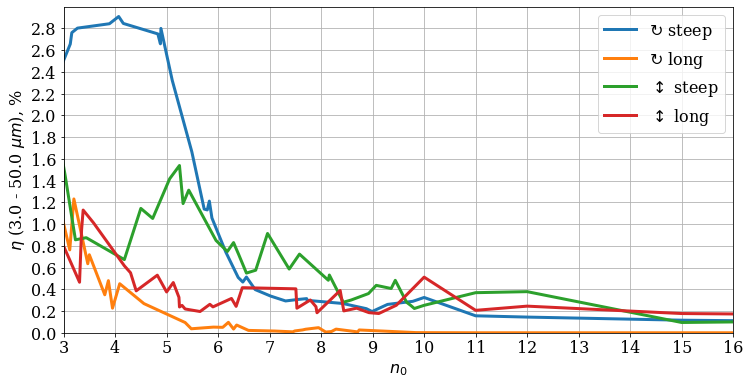

In [34]:
interactive_plot = interactive(built_graph_compare,
                            r1 = widgets.FloatRangeSlider(min=0,max=50,step=0.1,value= [3, 50]),
                            limit = widgets.FloatText(value= 3.0))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot